In [0]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_circles

In [0]:
def plot_clusters(points, cluster_labels,offset=0.01, show_annotation=True):
  # cluster_labels_unique=np.unique(np.array(cluster_labels))
  cluster_labels=np.array(cluster_labels)
  cluster_labels_unique=np.unique(cluster_labels)
  points=np.array(points)

  for cluster in cluster_labels_unique:
    plt.scatter(points[cluster_labels==cluster,0],points[cluster_labels==cluster,1],label=cluster)

  if show_annotation:
    for i in range(points.shape[0]):
      plt.annotate(i,(points[i,0]+offset,points[i,1]+offset))

  plt.legend()
  plt.show()

10
10


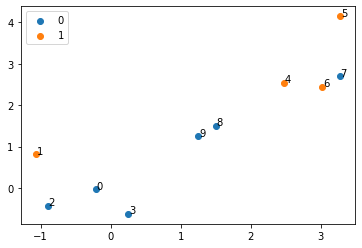

In [3]:
np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))
cluster = np.random.randint(2, size=(10)).astype('uint8')
print(points[:,0].shape[0])
print(points[:,1].shape[0])
plot_clusters(points,cluster)
 

In [0]:
def heatmap(grid, xlabels, ylabels, xrot=90):   
    cmap = cm.get_cmap("viridis")
    plt.imshow(grid, cmap=cmap)
    plt.xticks(np.arange(0,grid.shape[1],step=1), xlabels, rotation=xrot)
    plt.yticks(np.arange(0, grid.shape[0], step=1), ylabels)

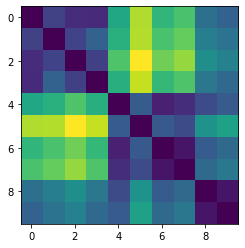

In [5]:
from sklearn.metrics.pairwise import euclidean_distances
plt.imshow(euclidean_distances(points,points))

In [0]:
def initialise(points, K):
  x = np.random.choice(range(len(points)), size=K, replace=False)
  return np.array([ points[i] for i in x ])

In [0]:
initialise([[1, 2], [3, 4], [5, 6], [4, 0], [0, 2]], 3)

array([[0, 2],
       [1, 2],
       [5, 6]])

In [0]:
def assign(points, cluster_centers):
  return np.argmin(euclidean_distances(points,cluster_centers),axis=1)

In [0]:
np.random.seed(2)
cluster_centers = np.array([[0,0], [1,1], [2,2]])
cluster_labels = assign(points, cluster_centers)
cluster_labels

array([0, 0, 0, 0, 2, 2, 2, 2, 1, 1])

In [0]:
def recalculate_cluster_centers(points, cluster_labels, K):
  cluster_centers = np.zeros((K, 2))
  for i in range(K):
    cluster_centers[i: ] = points[cluster_labels == i,:].mean(axis = 0)
  return cluster_centers

In [0]:
np.random.seed(2)
cluster_centers = np.array([[0,0], [1,1], [2,2]])
cluster_labels = assign(points, cluster_centers)
recalculate_cluster_centers(points, cluster_labels, 3)

array([[-0.48043851, -0.06287893],
       [ 1.375     ,  1.375     ],
       [ 3.00926244,  2.95863941]])

In [0]:
def KMeans(points, K):
  cluster_labels = np.zeros((points.shape[0]))
  cluster_centers = initialise(points, K)
  initial_centers = cluster_centers.copy()
  old_cluster_centers = np.zeros(cluster_centers.shape)
  while not (old_cluster_centers == cluster_centers).all():
    old_cluster_centers = cluster_centers.copy()

    cluster_labels = assign(points, cluster_centers)

    cluster_centers = recalculate_cluster_centers(points, cluster_labels, K)
    return cluster_labels, initial_centers, cluster_centers

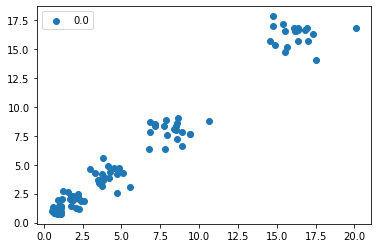

In [0]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))
    
points = np.vstack(X)
plot_clusters(points, np.zeros((points.shape[0])), show_annotation=False)

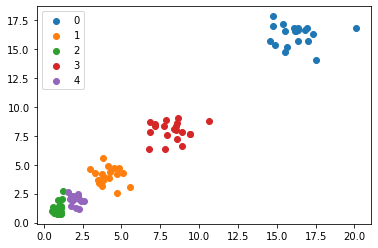

In [0]:
cluster_labels, initial_centers, cluster_centers = KMeans(points, K)
plot_clusters(points, cluster_labels, show_annotation=False)

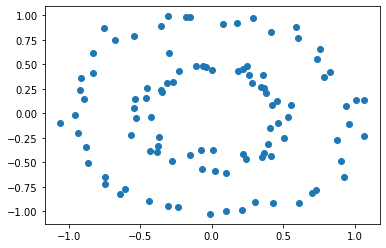

In [0]:
points, _ = make_circles(100, noise=0.06, factor=0.5)
plt.scatter(points[:,0], points[:,1])

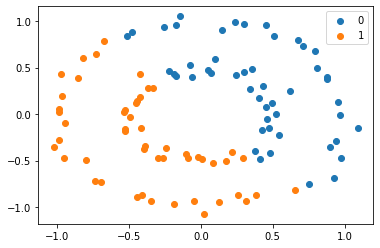

In [0]:
cluster_labels, initial_centers, cluster_centers = KMeans(points, 2)
plot_clusters(points, cluster_labels, show_annotation=False)

**Task1:** ​ Run the kmeans multiple times and see if averaging the cluster centers across runs
helps to reduce dependency on initialisation. Here the assumption is that good clustering is
more likely than bad one. Dataset: The 5 clusters

In [0]:
def KMeansAvg(points, K, initial):
  cluster_labels = np.zeros((points.shape[0]))
  cluster_centers = initial
  initial_centers = cluster_centers.copy()
  old_cluster_centers = np.zeros(cluster_centers.shape)
  while not (old_cluster_centers == cluster_centers).all():
    old_cluster_centers = cluster_centers.copy()

    cluster_labels = assign(points, cluster_centers)

    cluster_centers = recalculate_cluster_centers(points, cluster_labels, K)
    return cluster_labels, initial_centers, cluster_centers

In [0]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))

points = np.vstack(X)

In [0]:
initial_centers = initialise(points, K)
cluster_centers = initial_centers.copy()

Iteration: 1


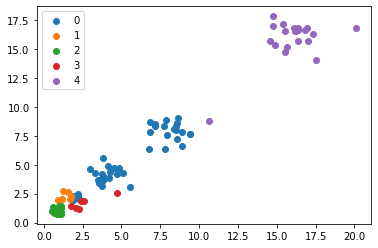

Iteration: 2


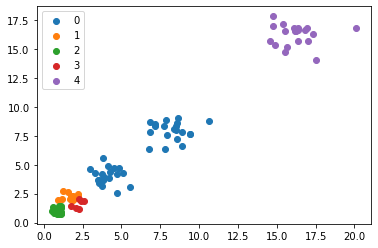

Iteration: 3


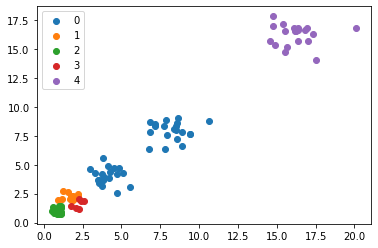

Iteration: 4


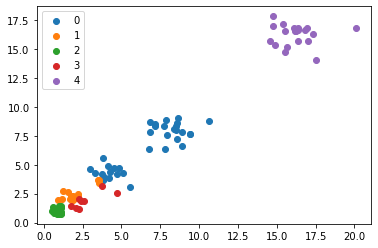

Iteration: 5


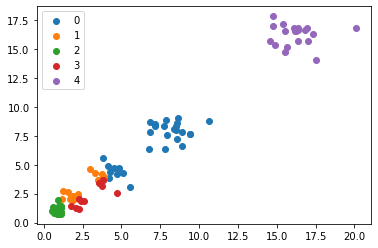

Iteration: 6


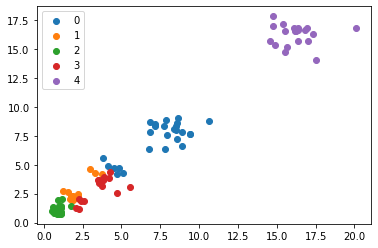

Iteration: 7


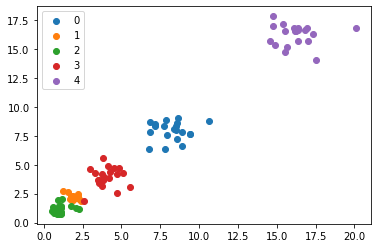

Iteration: 8


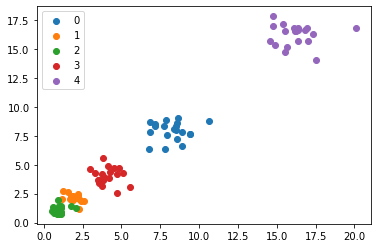

Iteration: 9


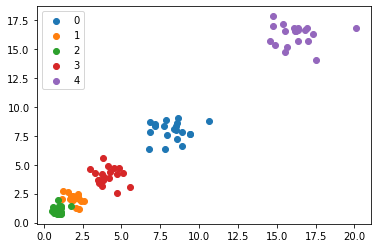

Iteration: 10


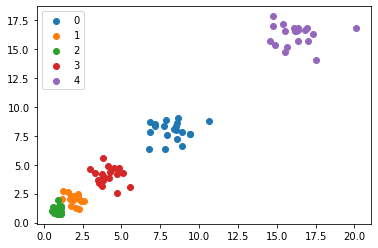

In [0]:
for iteration in range(10):
  print("Iteration: " + str(iteration + 1))
  cluster_labels, initial_centers, cluster_centers = KMeansAvg(points, K, (initial_centers + cluster_centers) / 2)
  plot_clusters(points, cluster_labels, show_annotation=False)

**Task2:**​ Run the algorithm on concentric circles dataset in r-theta space or some other space
you like.

In [0]:
points, _ = make_circles(100, noise=0.06, factor=0.5)

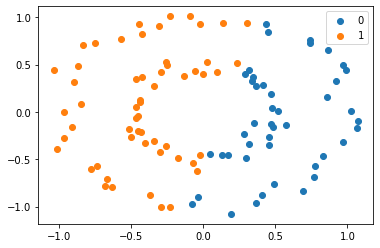

In [0]:
initial_centers = np.array([ [ np.sqrt(np.sum(i ** 2)), np.arctan2(i[1], i[0]) ] for i in initial_centers ]) # Convert Cartesian to Polar
cluster_centers = np.array([ [ np.sqrt(np.sum(i ** 2)), np.arctan2(i[1], i[0]) ] for i in cluster_centers ]) # Convert Cartesian to Polar
cluster_labels, initial_centers, cluster_centers = KMeans(points, 2)
initial_centers = np.array([ [ i[0] * np.cos(i[1]), i[0] * np.sin(i[1]) ] for i in initial_centers ]) # Convert Polar to Cartesian
cluster_centers = np.array([ [ i[0] * np.cos(i[1]), i[0] * np.sin(i[1]) ] for i in cluster_centers ]) # Convert Polar to Cartesian
plot_clusters(points, cluster_labels, show_annotation=False)